<a href="https://colab.research.google.com/github/LleilaA13/Thesis-MUL/blob/main/notebooks/modelzoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Lucent Modelzoo

A demonstration of how Lucent works with different pretrained models and provides some samples of visualizations on other models.

## Install, Import

In [2]:
!pip install --quiet git+https://github.com/greentfrapp/lucent.git

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [3]:
import torch

from lucent.optvis import render, param, transform, objectives
from lucent.modelzoo.util import get_model_layers

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## InceptionV1

In nearly all of the notebooks here, we will be using InceptionV1, which has been noted to have ["unusually semantically meaningful"](https://distill.pub/2018/building-blocks/) neurons.

While `torchvision.model` contains a pretrained InceptionV1 (aka GoogLeNet) model, we primarily use the Tensorflow pretrained InceptionV1 model in the Lucent notebooks to demonstrate consistency with the Lucid library. See instructions [here](https://github.com/greentfrapp/lucent/tree/master/lucent/modelzoo) to download the model weights.

In [4]:
from lucent.modelzoo import inceptionv1

By default, `inceptionv1` has a `redirected_ReLU` argument that is set to `True`. This builds the model using a modified ReLU layer that allows gradient to flow even when the forward input is negative.

This is because in some cases, especially for certain neurons such as `mixed4a:479`, the randomly initialized input falls into the dead zone of the ReLU function and there is no gradient signal to generate any meaningful visualization.

See [this script](https://github.com/tensorflow/lucid/blob/master/lucid/misc/redirected_relu_grad.py) in Lucid for more details, although Lucent implements a different [workaround](https://github.com/greentfrapp/lucent/blob/46ed374d3784076d91459e45fdee0f24148d9218/lucent/modelzoo/inceptionv1/helper_layers.py#L61).

In [5]:
# We have already downloaded the weights to inception5h.pth
inceptionv1_model = inceptionv1(pretrained=True)
_ = inceptionv1_model.to(device).eval()

Downloading: "https://github.com/ProGamerGov/pytorch-old-tensorflow-models/raw/master/inception5h.pth" to /root/.cache/torch/hub/checkpoints/inception5h.pth
100%|██████████| 27.0M/27.0M [00:00<00:00, 263MB/s]


Use `get_model_layers` to retrieve all the model layers.

*Note that for InceptionV1, we added some auxiliary layers for convenience so there are more layers listed than in the actual model.*

In [6]:
# Print the first 20 layer names
get_model_layers(inceptionv1_model)[:20]

['conv2d0_pre_relu_conv',
 'conv2d1_pre_relu_conv',
 'conv2d2_pre_relu_conv',
 'mixed3a_1x1_pre_relu_conv',
 'mixed3a_3x3_bottleneck_pre_relu_conv',
 'mixed3a_5x5_bottleneck_pre_relu_conv',
 'mixed3a_pool_reduce_pre_relu_conv',
 'mixed3a_3x3_pre_relu_conv',
 'mixed3a_5x5_pre_relu_conv',
 'mixed3b_1x1_pre_relu_conv',
 'mixed3b_3x3_bottleneck_pre_relu_conv',
 'mixed3b_5x5_bottleneck_pre_relu_conv',
 'mixed3b_pool_reduce_pre_relu_conv',
 'mixed3b_3x3_pre_relu_conv',
 'mixed3b_5x5_pre_relu_conv',
 'mixed4a_1x1_pre_relu_conv',
 'mixed4a_3x3_bottleneck_pre_relu_conv',
 'mixed4a_5x5_bottleneck_pre_relu_conv',
 'mixed4a_pool_reduce_pre_relu_conv',
 'mixed4a_3x3_pre_relu_conv']

Then we can just use `render.render_vis` to generate a visualization of a channel at a particular layer.

100%|██████████| 512/512 [00:22<00:00, 22.75it/s]



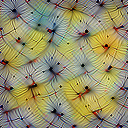

In [7]:
_ = render.render_vis(inceptionv1_model, "mixed4a:107", show_inline=True)

We can also try to optimize for a particular label by just passing "labels" as the layer name, which will use the last layer in the model.

But note that for this version of InceptionV1, the label IDs are different from the usual IDs. See [here](https://github.com/greentfrapp/lucent/blob/master/lucent/modelzoo/misc/old_imagenet_labels.txt) for the InceptionV1 IDs and [here](https://github.com/greentfrapp/lucent/blob/master/lucent/modelzoo/misc/imagenet_labels.txt) for the usual IDs.

In [ ]:
# We can try to optimize for "strawberry" which has label ID 229 for this model
_ = render.render_vis(inceptionv1_model, "labels:229", show_inline=True)

 43%|████▎     | 222/512 [00:10<00:13, 22.28it/s]

Unfortunately we don't get very good results, because we are optimizing the output of a softmax layer.

To maximize a particular softmax output, the model can choose to maximize the corresponding input, minimize all other inputs or some combination in between.  We would get a much better visualization if we can directly maximize the logits instead, which we can for the `torchvision` models!

## Other Models

Lucent works with pretrained models from `torchvision.models` out of the box!

### ResNet50

In [ ]:
from torchvision.models import resnet50

resnet50_model = resnet50(pretrained=True).to(device).eval()

In [ ]:
# Print the first 20 layer names
get_model_layers(resnet50_model)[:20]

In [ ]:
# render_vis works in the same way! Just substitute the appropriate layer name!
_ = render.render_vis(resnet50_model, "layer4_1_conv1:121", show_inline=True)

In the previous InceptionV1 model, we only had access to the softmax outputs for the predicted labels, so the visualizations weren't great. Here, we have direct access to the logits! You can check to see that the last layer in the model is a linear layer and not a softmax.

In [ ]:
# Try to activate the strawberry label (949 for usual ImageNet mapping)
_ = render.render_vis(resnet50_model, "labels:949", show_inline=True)

In [ ]:
# Try to activate the strawberry label using CPPN parameterization
cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model, "labels:949", cppn_param_f, cppn_opt, show_inline=True)

### InceptionV1 from `torchvision`

We can also try out `torchvision`'s InceptionV1 model, which is known as GoogLeNet.

In [ ]:
from torchvision.models import googlenet

googlenet_model = googlenet(pretrained=True).to(device).eval()

Notice that although the architecture is the same, the layer names are different from Tensorflow's InceptionV1.

In [ ]:
# Print the first 20 layer names
get_model_layers(googlenet_model)[:20]

The model weights are different even though the architecture is the same. So we can try to visualize the same layers and channels, but the results will be different.

In [ ]:
# Try to visualize same channel as above's mixed4a:107
_ = render.render_vis(googlenet_model, "inception4a:107", show_inline=True)

Again, we have direct access to the logits, so we can get better visualizations when optimizing for target labels!

In [ ]:
# Try optimizing for the strawberry label again
_ = render.render_vis(googlenet_model, "labels:949", show_inline=True, verbose=True)

In [ ]:
# Optimizing for strawberries with CPPN
_ = render.render_vis(googlenet_model, "labels:949", cppn_param_f, cppn_opt, show_inline=True)

### MobileNetV2

Let's pick a lightweight one for the last example!

In [ ]:
# lucent.modelzoo also acts as a wrapper around torchvision.models
from lucent.modelzoo import mobilenet_v2

mobilenet_v2_model = mobilenet_v2(pretrained=True).to(device).eval()

In [ ]:
# Again print out first 20 layers
get_model_layers(mobilenet_v2_model)[:20]

In [ ]:
_ = render.render_vis(mobilenet_v2_model, "features_15:45", show_inline=True)

In [ ]:
# More strawberries!
_ = render.render_vis(mobilenet_v2_model, "labels:949", show_inline=True)

In [ ]:
# One last strawberry
_ = render.render_vis(mobilenet_v2_model, "labels:949", cppn_param_f, cppn_opt, show_inline=True)

## Try it with other models from `torchvision`!